In [156]:
import os.path

import astropy.table
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from astropy.io import fits,ascii
import pandas as pd
import cmasher as cmr
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import pingouin

In [157]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv('/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv')
master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_master_source_catalogue.csv",skiprows=16)
prospect = prospect[prospect['MAGPIID'].isin(onere["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(onere["MAGPIID"])]
bpt = bpt[bpt["MAGPIID"].isin(onere["MAGPIID"])]
ssp = ssp[ssp["MAGPIID"].isin(onere["MAGPIID"])]
master = master[master['MAGPIID'].isin(onere["MAGPIID"])]
sample = sample[sample["MAGPIID"].isin(onere["MAGPIID"])]

/var/folders/hn/phg07l9934x4013mnrp122c40000gn/T/ipykernel_2918/2078251302.py:58: RuntimeWarning: divide by zero encountered in log10
  ax2.hist(np.log10(re2), label="All Galaxies", color="k", alpha=0.2, zorder=1,bins=np.arange(1,4,0.20))
/var/folders/hn/phg07l9934x4013mnrp122c40000gn/T/ipykernel_2918/2078251302.py:58: RuntimeWarning: invalid value encountered in log10
  ax2.hist(np.log10(re2), label="All Galaxies", color="k", alpha=0.2, zorder=1,bins=np.arange(1,4,0.20))


10.738489740982777
9.376161303652186
2.35
3.0303738317757003
471.3371816298457
592.7618392808502


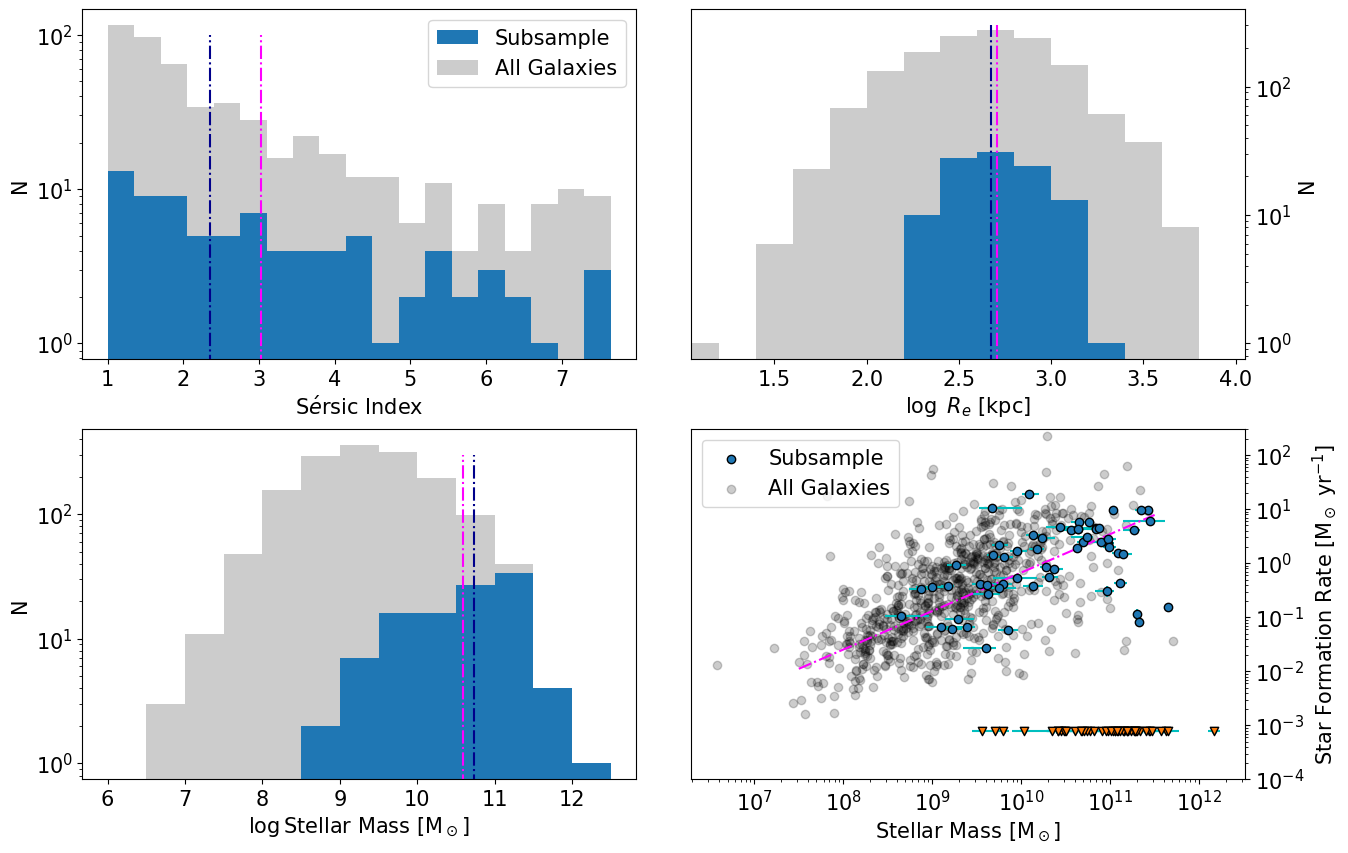

In [158]:
# sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
# sample = sample[sample['v_asym_15re']<0.1]
# sample = pd.read_csv("MAGPI_csv/MAGPI_kinemetry_sample.csv")

sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
# SFMS & Mass
t = ascii.read("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_Balmer_SFRs_onedspec.tbl")
df=pd.DataFrame({"MAGPIID":np.array(t['MAGPI_ID']),
                "SFR":np.array(t["SFR"]),
                "SFR_err":np.array(t["SFR_err"])})
df1 = df[df["MAGPIID"].isin(sample["MAGPIID"])]
df2 = df[~df["MAGPIID"].isin(sample["MAGPIID"])]
SFR = df1["SFR"].to_numpy()
bpt = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv")
#SFR = bpt["SFR, dust corrected"].to_numpy()
SFR_err = df1["SFR_err"].to_numpy()
SFR_2 = df2["SFR"].to_numpy()
SFR[np.isnan(SFR)]=10**(-3.1)
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
M_sol = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_median"].to_numpy()
mass_err_16 = M_sol-prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_16"].to_numpy()
mass_err_84 = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]["StellarMass_84"].to_numpy()-M_sol
M_sol_2 = prospect[prospect["MAGPIID"].isin(df2["MAGPIID"].to_numpy())]["StellarMass_median"].to_numpy()
xx = np.logspace(7.5,11.5, 107)
MS = (xx**0.712)*(10**-7.293)
# Sersic
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
galfit = galfit[~galfit["MAGPIID"].isin(sample["MAGPIID"])]
n2 = galfit["n"]
n2 = n2[n2 > 0]
re2 = galfit["re"].to_numpy()
#re2[re2==0]=np.nan
dl = cosmo.luminosity_distance(galfit["z"].to_numpy()).to(u.kpc).value
re2 = (re2/3600)*dl
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
galfit = galfit[galfit["MAGPIID"].isin(sample["MAGPIID"])]
n = galfit["n"]
n = n[n > 0]
re = galfit["re"].to_numpy()
dl = cosmo.luminosity_distance(galfit["z"].to_numpy()).to(u.kpc).value
re = (re/3600)*dl

plt.rcParams.update({"font.size":15})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Sersic
ax1.hist(n, zorder=2, label="Subsample", bins=np.arange(1,8,0.35))
ax1.hist(n2, label="All Galaxies", color="k", bins=np.arange(1,8,0.35), alpha=0.2)
ax1.vlines(np.median(n), ymin=0, ymax=100,color="darkblue",ls="dashdot")
ax1.vlines(np.mean(n), ymin=0, ymax=100,color="fuchsia",ls="dashdot")
#ax.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylabel("N")
ax1.set_xlabel(r"S$\'{e}$rsic Index")
ax1.legend()
# Environment
ax2.hist(np.log10(re), label="Subsample", zorder=2,bins=np.arange(1,4,0.20))
#ax2.hist(N_Gals_0, zorder=2, label="No Env. Metrics")
ax2.hist(np.log10(re2), label="All Galaxies", color="k", alpha=0.2, zorder=1,bins=np.arange(1,4,0.20))
ax2.set_yscale("log")
ax2.set_xlabel(r"$\log$ $R_e$ [kpc]")
ax2.vlines(np.median(np.log10(re)), ymin=0, ymax=300,color="darkblue",linestyles="dashdot")
ax2.vlines(np.mean(np.log10(re)),ymin=0, ymax=300,color="fuchsia",ls="dashdot")
ax2.set_ylabel("N")
#ax2.legend()
ax2.set_xlim(1.05,4.05)
# Mass
ax3.hist(np.log10(M_sol), zorder=2, label="Subsample", bins=np.arange(6,13,0.5))
ax3.hist(np.log10(M_sol_2), label="All Galaxies", color="k", bins=np.arange(6,13,0.5), alpha=0.2)
ax3.vlines(np.median(np.log10(M_sol)), ymin=0, ymax=300,color="darkblue",ls="dashdot")
ax3.vlines(np.mean(np.log10(M_sol)), ymin=0, ymax=300,color="fuchsia",ls="dashdot")
ax3.set_ylabel("N")
ax3.set_yscale("log")
ax3.set_xlabel(r"$\log$Stellar Mass [M$_\odot$]")
#ax3.legend()
# SFMS
ax4.scatter(M_sol[SFR>10**(-3)], SFR[SFR>10**(-3)], zorder=3, label="Subsample", ec="k")
ax4.scatter(M_sol[SFR<10**(-3)], SFR[SFR<10**(-3)], zorder=3, ec="k",marker="v")
ax4.errorbar(M_sol, SFR, xerr=[mass_err_16,mass_err_84], yerr=SFR_err, zorder=2, fmt=".c", ls="")
ax4.scatter(M_sol_2, SFR_2, zorder=1, alpha=0.2, c="k", label="All Galaxies")
ax4.plot(xx, MS, ls="dashdot", c="magenta")
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(1e-4, 300)
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_ylabel(r"Star Formation Rate [M$_\odot$ yr$^{-1}$]")
ax4.legend()
for ax in [ax2, ax4]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/SFMS_Mass_Sersic_Env.pdf", bbox_inches="tight")
print(np.median(np.log10(M_sol)))
print(np.mean(np.log10(M_sol_2)))
print(np.median(n))
print(np.mean(n))
print(np.median(re))
print(np.mean(re))

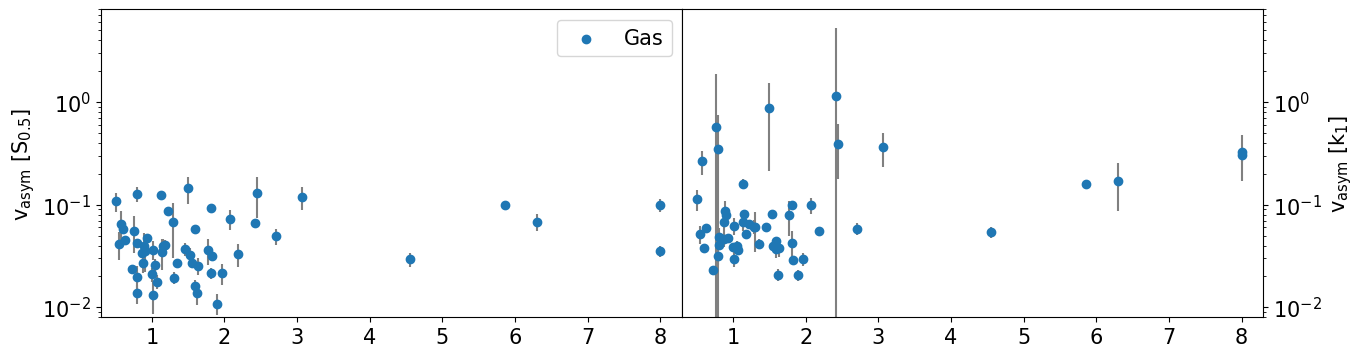

In [159]:
onre = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
sample = sample[sample["MAGPIID"].isin(onre["MAGPIID"])]
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
galfit = galfit[galfit["MAGPIID"].isin(onre["MAGPIID"])]
vs_s05 = sample["v_asym_s"].to_numpy()
vs_s05_err=sample["v_asym_s_err"].to_numpy()
vg_s05 = sample["v_asym_g"].to_numpy()
vg_s05_err=sample["v_asym_g_err"].to_numpy()
vs_onere = onere["v_asym_s"].to_numpy()
vs_onere_err = onere["v_asym_s_err"].to_numpy()
vg_onere = onere["v_asym_g"].to_numpy()
vg_onere_err = onere["v_asym_g_err"].to_numpy()
n = galfit["n"].to_numpy()
fig,ax = plt.subplots(1,2,figsize=(15,4))
#ax[0].scatter(n,vs_s05,zorder=2,label="Stars")
ax[0].scatter(n,vg_s05,zorder=2,label="Gas")
#ax[0].errorbar(n,vs_s05,yerr=vs_s05_err,ls="",color="grey",zorder=1)
ax[0].errorbar(n,vg_s05,yerr=vg_s05_err,ls="",color="grey",zorder=1)
#ax[1].scatter(n,vs_onere,zorder=3,label="Stars")
ax[1].scatter(n,vg_onere,zorder=3,label="Gas")
#ax[1].errorbar(n,vs_s05,yerr=vs_onere_err,ls="",color="grey",zorder=2)
ax[1].errorbar(n,vg_onere,yerr=vg_onere_err,ls="",color="grey",zorder=2)
for axes in ax.flat:
    axes.set_yscale("log")
    axes.set_yscale("log")
    axes.set_ylim(8e-3,8)
    axes.set_xlim(0.3,8.3)
#ax.set_xlabel(r"S$\'{\rm e}$rsic index")
ax[0].set_ylabel(r"v$_{\rm asym}$ [S$_{0.5}$]")
ax[1].set_ylabel(r"v$_{\rm asym}$ [k$_1$]")
ax[0].legend()
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_vs_k1.pdf",
            bbox_inches="tight")

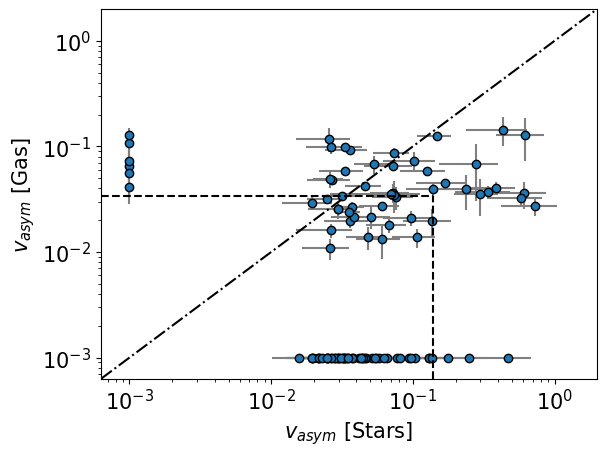

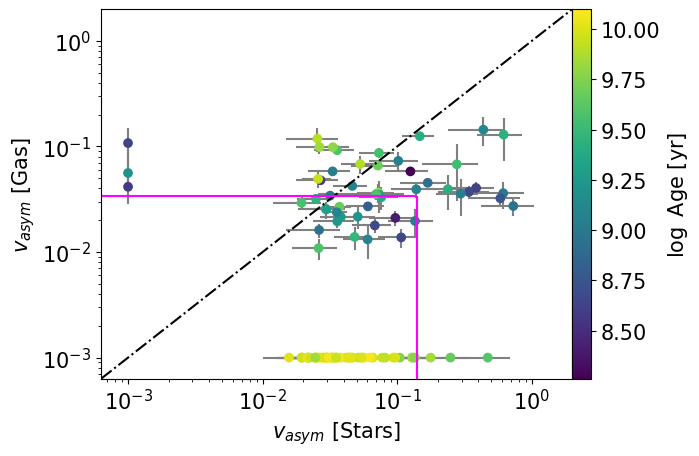

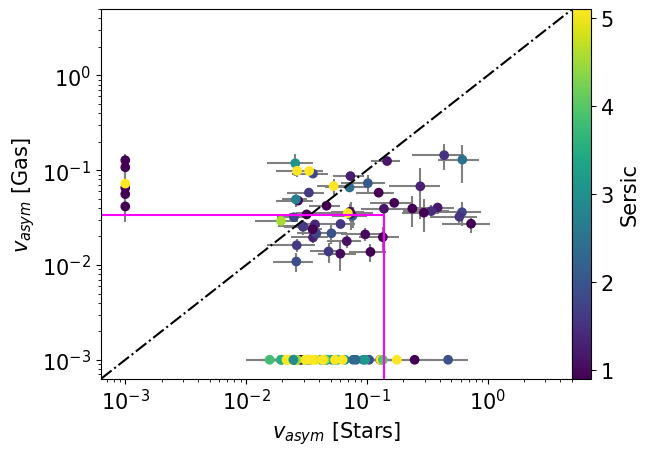

In [160]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
# onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv('/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv')
master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_master_source_catalogue.csv",skiprows=16)
prospect = prospect[prospect['MAGPIID'].isin(sample["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(sample["MAGPIID"])]
bpt = bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp = ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]
master = master[master['MAGPIID'].isin(sample["MAGPIID"])]
#sample = sample[sample["MAGPIID"].isin(onere["MAGPIID"])]

vs = sample["v_asym_s"].to_numpy()
vs_err=sample["v_asym_s_err"].to_numpy()
vg = sample["v_asym_g"].to_numpy()
vg_err=sample["v_asym_g_err"].to_numpy()
age = ssp["logage_LW_1re"].to_numpy()
mass = prospect["StellarMass_median"].to_numpy()
mass_err_16 = mass - prospect["StellarMass_16"].to_numpy()
mass_err_84 = prospect["StellarMass_84"].to_numpy() - mass

vs_err[np.isnan(vs)]=0
vg_err[np.isnan(vg)]=0
vs[np.isnan(vs)]=1e-3
vg[np.isnan(vg)]=1e-3

fig,ax=plt.subplots()
p=ax.scatter(vs,vg,ec="k",zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,color="grey",ls='',zorder=1)
ax.plot(np.logspace(-3.2,0.7),np.logspace(-3.2,0.7),ls="dashdot",color="k")
ax.set_xlabel(r"$v_{asym}$ [Stars]")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(10**(-3.2),10**(0.3))
ax.set_ylim(10**(-3.2),10**(0.3))
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),color='k',ls="dashed")
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),color="k",ls="dashed")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_gas_stars.pdf",bbox_inches="tight")

fig,ax=plt.subplots()
p=ax.scatter(vs,vg,c=age,zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,color="grey",ls='',zorder=1)
ax.plot(np.logspace(-3.2,0.7),np.logspace(-3.2,0.7),ls="dashdot",color="k")
ax.set_xlabel(r"$v_{asym}$ [Stars]")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
ax.set_xscale("log")
ax.set_yscale("log")
cbar = plt.colorbar(p,ax=ax,fraction=0.05,pad=0.00,label=r"$\log$ Age [yr]")
ax.set_xlim(10**(-3.2),10**(0.3))
ax.set_ylim(10**(-3.2),10**(0.3))
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),color='magenta')
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),color="magenta")
#cbar.ax.set_yticklabels([8.95,9.05,9.15,9.25,9.35,9.45,9.55,9.65,9.75])
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_gas_stars_age.pdf",bbox_inches="tight")

fig,ax=plt.subplots()
p=ax.scatter(vs,vg,c=galfit["n"],vmin=0.9,vmax=5.1,zorder=2)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,color="grey",ls='',zorder=1)
ax.plot(np.logspace(-3.2,0.7),np.logspace(-3.2,0.7),ls="dashdot",color="k")
ax.set_xlabel(r"$v_{asym}$ [Stars]")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
ax.set_xscale("log")
ax.set_yscale("log")
plt.colorbar(p,ax=ax,fraction=0.05,pad=0.00,label="Sersic")
ax.set_xlim(10**(-3.2),10**(0.7))
ax.set_ylim(10**(-3.2),10**(0.7))
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),color='magenta')
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),color="magenta")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_gas_stars_sersic.pdf",bbox_inches="tight")

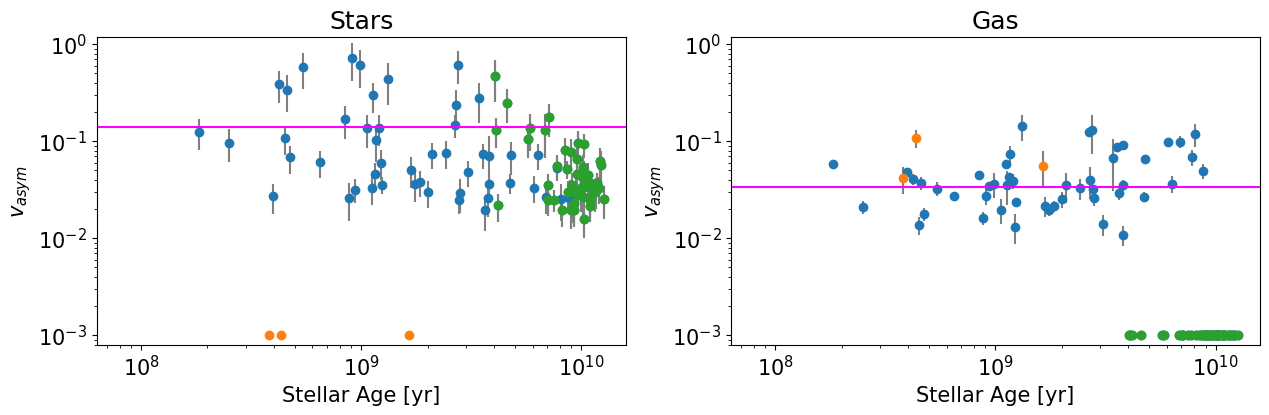

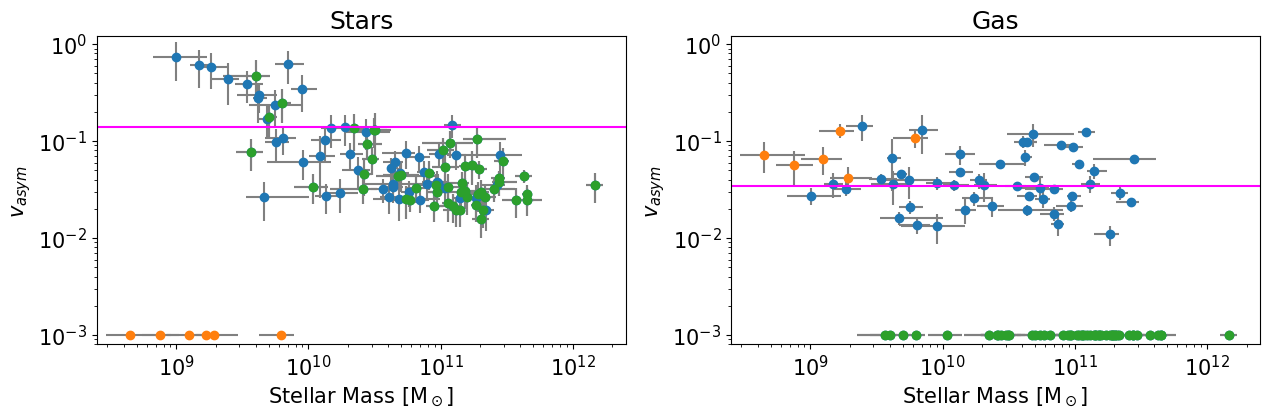

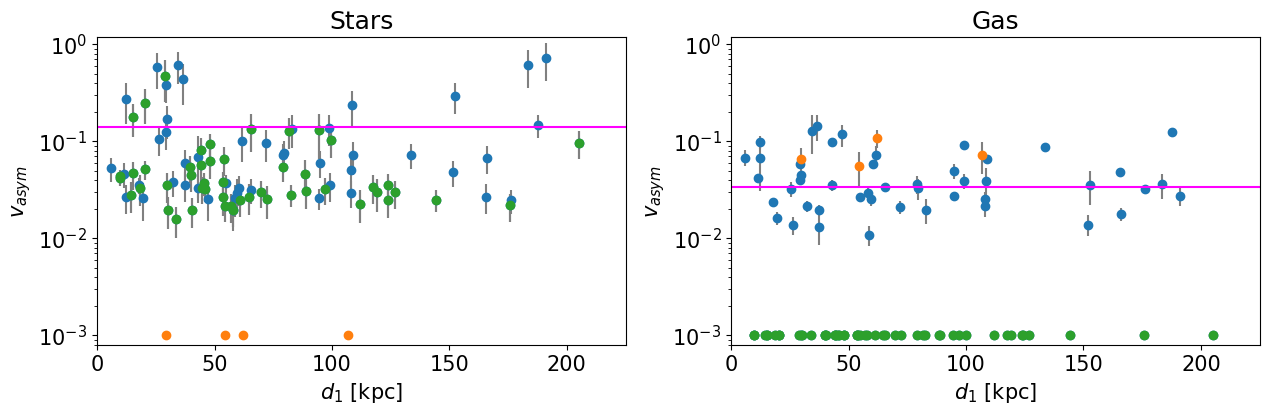

In [161]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.scatter(10**(age[vs>2e-3]),vs[vs>2e-3],zorder=2)
ax1.errorbar(10**(age[vs>2e-3]),vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax1.scatter(10**(age[vs<2e-3]),vs[vs<2e-3],zorder=2)
ax1.errorbar(10**(age[vs<2e-3]),vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax1.scatter(10**(age[vg<2e-3]),vs[vg<2e-3],zorder=2)
ax1.errorbar(10**(age[vg<2e-3]),vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(10**(age[vs>2e-3]),vg[vs>2e-3],zorder=2)
ax2.errorbar(10**(age[vs>2e-3]),vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax2.scatter(10**(age[vs<2e-3]),vg[vs<2e-3],zorder=2)
ax2.errorbar(10**(age[vs<2e-3]),vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(10**(age[vg<2e-3]),vg[vg<2e-3],zorder=2)
ax2.errorbar(10**(age[vg<2e-3]),vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax1.hlines(y=np.std(vs[vs>2e-3]),xmin=10**7,xmax=10**12,color="magenta")
ax2.hlines(y=np.std(vg[vg>2e-3]),xmin=10**7,xmax=10**12,color="magenta")
for ax in [ax1,ax2]:
    ax.set_xlim(10**(7.8),10**(10.2))
    ax.set_ylim(8e-4,1.2)
ax2.set_yscale("log")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.set_title("Stars")
ax2.set_title("Gas")
ax1.set_ylabel(r"$v_{asym}$")
ax2.set_ylabel(r"$v_{asym}$")
ax1.set_xlabel(r"Stellar Age [yr]")
ax2.set_xlabel(r"Stellar Age [yr]")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
#plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_age.pdf",bbox_inches="tight")

mass = prospect["StellarMass_median"].to_numpy()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.scatter(mass[vs>2e-3],vs[vs>2e-3],zorder=2)
ax1.errorbar(mass[vs>2e-3],vs[vs>2e-3],yerr=vs_err[vs>2e-3],
             xerr=[mass_err_16[vs>2e-3],mass_err_84[vs>2e-3]],ls="",color="grey",zorder=1)
ax1.scatter(mass[vs<2e-3],vs[vs<2e-3],zorder=2)
ax1.errorbar(mass[vs<2e-3],vs[vs<2e-3],yerr=vs_err[vs<2e-3],
             xerr=[mass_err_16[vs<2e-3],mass_err_84[vs<2e-3]],ls="",color="grey",zorder=1)
ax1.scatter(mass[vg<2e-3],vs[vg<2e-3],zorder=2)
ax1.errorbar(mass[vg<2e-3],vs[vg<2e-3],yerr=vs_err[vg<2e-3],
             xerr=[mass_err_16[vg<2e-3],mass_err_84[vg<2e-3]],ls="",color="grey",zorder=1)
ax2.scatter(mass[vs>2e-3],vg[vs>2e-3],zorder=2)
ax2.errorbar(mass[vs>2e-3],vg[vs>2e-3],yerr=vg_err[vs>2e-3],
             xerr=[mass_err_16[vs>2e-3],mass_err_84[vs>2e-3]],ls="",color="grey",zorder=1)
ax2.scatter(mass[vs<2e-3],vg[vs<2e-3],zorder=2)
ax2.errorbar(mass[vs<2e-3],vg[vs<2e-3],yerr=vg_err[vs<2e-3],
             xerr=[mass_err_16[vs<2e-3],mass_err_84[vs<2e-3]],ls="",color="grey",zorder=1)
ax2.scatter(mass[vg<2e-3],vg[vg<2e-3],zorder=2)
ax2.errorbar(mass[vg<2e-3],vg[vg<2e-3],yerr=vg_err[vg<2e-3],
             xerr=[mass_err_16[vg<2e-3],mass_err_84[vg<2e-3]],ls="",color="grey",zorder=1)
ax1.hlines(y=np.std(vs[vs>2e-3]),xmin=10**7,xmax=10**13,color="magenta")
ax2.hlines(y=np.std(vg[vg>2e-3]),xmin=10**7,xmax=10**13,color="magenta")
for ax in [ax1,ax2]:
    ax.set_xlim(10**(8.4),10**(12.4))
    ax.set_ylim(8e-4,1.2)
ax2.set_yscale("log")
ax2.set_xscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Stars")
ax2.set_title("Gas")
ax1.set_ylabel(r"$v_{asym}$")
ax2.set_ylabel(r"$v_{asym}$")
ax1.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax2.set_xlabel(r"Stellar Mass [M$_\odot$]")
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_mass.pdf",bbox_inches="tight")

env = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(sample["MAGPIID"])]
env_sample = sample[sample["MAGPIID"].isin(env["MAGPIID"])]
vs = env_sample["v_asym_s"].to_numpy()
vs_err=env_sample["v_asym_s_err"].to_numpy()
vg = env_sample["v_asym_g"].to_numpy()
vg_err=env_sample["v_asym_g_err"].to_numpy()
d1 = env["d1,kpc"].to_numpy()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
ax1.scatter(d1[vs>2e-3],vs[vs>2e-3],zorder=2)
#ax1.scatter(d1[vs>2e-3],vs[vs>2e-3],zorder=2,ec="k")
ax1.errorbar(d1[vs>2e-3],vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax1.scatter(d1[vs<2e-3],vs[vs<2e-3],zorder=2)
ax1.errorbar(d1[vs<2e-3],vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax1.scatter(d1[vg<2e-3],vs[vg<2e-3],zorder=2)
ax1.errorbar(d1[vg<2e-3],vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(d1[vs>2e-3],vg[vs>2e-3],zorder=2)
#ax2.scatter(d1[(vg>2e-3) & (vs>vg) & (vg!=1e-3)],vg[(vg>2e-3) & (vs>vg) & (vg!=1e-3)],zorder=2,ec="k")
ax2.errorbar(d1[vs>2e-3],vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax2.scatter(d1[vs<2e-3],vg[vs<2e-3],zorder=2)
ax2.errorbar(d1[vs<2e-3],vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax2.scatter(d1[vg<2e-3],vg[vg<2e-3],zorder=2)
ax2.errorbar(d1[vg<2e-3],vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax1.hlines(y=np.std(vs[vs>2e-3]),xmin=0,xmax=250,color="magenta")
ax2.hlines(y=np.std(vg[vg>2e-3]),xmin=0,xmax=250,color="magenta")
for ax in [ax1,ax2]:
    ax.set_xlim(0,225)
    ax.set_ylim(8e-4,1.2)
ax2.set_yscale("log")
ax1.set_yscale("log")
#ax2.set_xscale("log")
#ax1.set_xscale("log")
ax1.set_title("Stars")
ax2.set_title("Gas")
ax1.set_ylabel(r"$v_{asym}$")
ax2.set_ylabel(r"$v_{asym}$")
ax1.set_xlabel(r"$d_1$ [kpc]")
ax2.set_xlabel(r"$d_1$ [kpc]")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
#plt.subplots_adjust(wspace=0)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_d1.pdf",bbox_inches="tight")

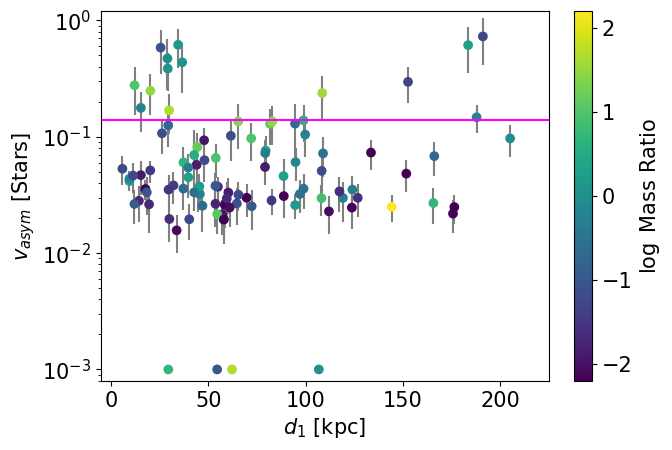

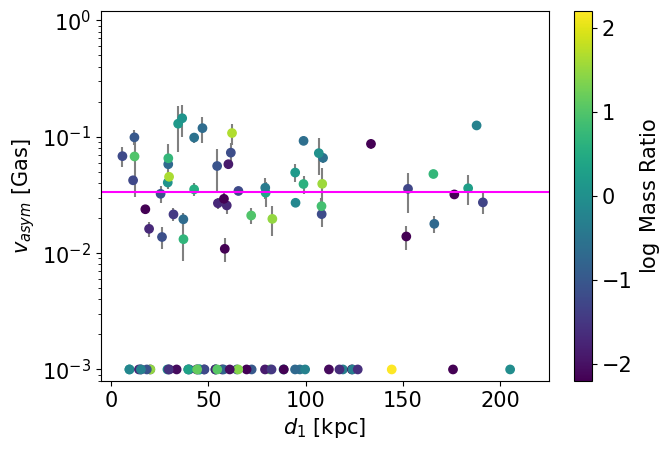

In [178]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
# onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
bpt = pd.read_csv('/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_BPT.csv')
master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_master_source_catalogue.csv",skiprows=16)
prospect = prospect[prospect['MAGPIID'].isin(sample["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(sample["MAGPIID"])]
bpt = bpt[bpt["MAGPIID"].isin(sample["MAGPIID"])]
ssp = ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]
master = master[master['MAGPIID'].isin(sample["MAGPIID"])]
#sample = sample[sample["MAGPIID"].isin(onere["MAGPIID"])]

vs = sample["v_asym_s"].to_numpy()
vs_err=sample["v_asym_s_err"].to_numpy()
vg = sample["v_asym_g"].to_numpy()
vg_err=sample["v_asym_g_err"].to_numpy()
age = ssp["logage_LW_1re"].to_numpy()
mass = prospect["StellarMass_median"].to_numpy()
mass_err_16 = mass - prospect["StellarMass_16"].to_numpy()
mass_err_84 = prospect["StellarMass_84"].to_numpy() - mass

vs_err[np.isnan(vs)]=0
vg_err[np.isnan(vg)]=0
vs[np.isnan(vs)]=1e-3
vg[np.isnan(vg)]=1e-3
env = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(sample["MAGPIID"])]
env_sample = sample[sample["MAGPIID"].isin(env["MAGPIID"])]
ssp_env = ssp[ssp["MAGPIID"].isin(env["MAGPIID"])]
age = ssp_env["logage_LW_1re"].to_numpy()
vs = env_sample["v_asym_s"].to_numpy()
vs_err=env_sample["v_asym_s_err"].to_numpy()
vg = env_sample["v_asym_g"].to_numpy()
vg_err=env_sample["v_asym_g_err"].to_numpy()
d1 = env["d1,kpc"].to_numpy()
mass_rat = env["mass_ratio"].to_numpy()

fig,ax = plt.subplots()
p=ax.scatter(d1,vs,zorder=2,c=np.log10(mass_rat),vmin=-2.2,vmax=2.2)
ax.errorbar(d1,vs,
             yerr=vs_err,
             ls="",color="grey",zorder=1)
# ax[0].scatter(d1[(vs>2e-3) & (vg<2e-3) & (age>9)],
#             vs[(vs>2e-3) & (vg<2e-3) & (age>9)],
#             zorder=2,
#             c=np.log10(mass_rat[(vs>2e-3) & (vg<2e-3) & (age>9)]))
# ax[0].errorbar(d1[(vs>2e-3) & (vg<2e-3) & (age>9)],
#              vs[(vs>2e-3) & (vg<2e-3) & (age>9)],
#              yerr=vs_err[(vs>2e-3) & (vg<2e-3) & (age>9)],
#              ls="",color="grey",zorder=1)
ax.hlines(y=np.std(vs[vs>2e-3]),xmin=-30,xmax=250,color="magenta")
#ax[1].hlines(y=np.std(vs[vs>2e-3]),xmin=-30,xmax=250,color="magenta")
#ax2.hlines(y=np.std(vg[vg>2e-3]),xmin=-30,xmax=250,color="magenta")
#for axes in ax.flat:
ax.set_xlim(-5,225)
ax.set_ylim(8e-4,1.2)
#ax.legend()

ax.set_yscale("log")
#ax[1].set_yscale("log")
ax.set_ylabel(r"$v_{asym}$ [Stars]")
#ax[1].set_ylabel(r"$v_{asym}$ [Stars]")
ax.set_xlabel(r"$d_1$ [kpc]")
#ax[1].set_xlabel(r"$d_1$ [kpc]")
plt.colorbar(p,ax=ax,label=r"$\log$ Mass Ratio",fraction=0.047,pad=0.05)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_d1_stars_mass_ratio.pdf",bbox_inches="tight")

fig,ax = plt.subplots()
p=ax.scatter(d1,
            vg,
            zorder=2,
            c=np.log10(mass_rat),vmin=-2.2,vmax=2.2)
ax.errorbar(d1,
             vg,
             yerr=vg_err,
             ls="",color="grey",zorder=1)
# ax[0].scatter(d1[(vs>2e-3) & (vg<2e-3) & (age>9)],
#             vs[(vs>2e-3) & (vg<2e-3) & (age>9)],
#             zorder=2,
#             c=np.log10(mass_rat[(vs>2e-3) & (vg<2e-3) & (age>9)]))
# ax[0].errorbar(d1[(vs>2e-3) & (vg<2e-3) & (age>9)],
#              vs[(vs>2e-3) & (vg<2e-3) & (age>9)],
#              yerr=vs_err[(vs>2e-3) & (vg<2e-3) & (age>9)],
#              ls="",color="grey",zorder=1)
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=-30,xmax=250,color="magenta")
#ax[1].hlines(y=np.std(vs[vs>2e-3]),xmin=-30,xmax=250,color="magenta")
#ax2.hlines(y=np.std(vg[vg>2e-3]),xmin=-30,xmax=250,color="magenta")
#for axes in ax.flat:
ax.set_xlim(-5,225)
ax.set_ylim(8e-4,1.2)
#ax.legend()

ax.set_yscale("log")
#ax[1].set_yscale("log")
ax.set_ylabel(r"$v_{asym}$ [Gas]")
#ax[1].set_ylabel(r"$v_{asym}$ [Stars]")
ax.set_xlabel(r"$d_1$ [kpc]")
#ax[1].set_xlabel(r"$d_1$ [kpc]")
plt.colorbar(p,ax=ax,label=r"$\log$ Mass Ratio",fraction=0.047,pad=0.05)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_vs_d1_gas_mass_ratio.pdf",bbox_inches="tight")

In [163]:
np.degrees(0.21/3600)*3600

12.032113697747286

In [164]:
env = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")

master = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/"
                     "MAGPI_master_source_catalogue.csv",skiprows=16)
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")

from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
#master = master[master["MAGPIID"].isin(sample["MAGPIID"])]
gal = np.zeros(len(env))
d1_ = np.zeros(len(env))
mass_rat = np.zeros(len(env))
for i in range(len(env)):
    group = env[env['GroupName'].isin([env["GroupName"].to_numpy()[i]])]
    group_master = master[master["MAGPIID"].isin(group["MAGPIID"])]
    #print([env_sample['MAGPIID'].to_numpy()[i]])
    sample_master = master[master['MAGPIID'].isin([env['MAGPIID'].to_numpy()[i]])]
    sample_prospect = prospect[prospect["MAGPIID"].isin(group_master['MAGPIID'])]
    x = group_master["xmax"].to_numpy()
    y = group_master["ymax"].to_numpy()
    #print(x,y)
    x0 = sample_master["xmax"].to_numpy()[0]
    y0 = sample_master["ymax"].to_numpy()[0]
    z = sample_master["z"].to_numpy()[0]
    mass = sample_prospect["StellarMass_median"].to_numpy()
    gal[i] = sample_master["MAGPIID"].to_numpy()[0]
    mass0 = sample_prospect[sample_prospect["MAGPIID"].isin(sample_master["MAGPIID"].to_numpy())]["StellarMass_median"].to_numpy()[0]
    #print(x0,y0)
    d1 = np.sqrt((x-x0)**2 + (y-y0)**2)
    d1_min = np.min(d1[d1>0])
    d1_mass = d1[d1==d1_min]
    #print(d1_mass)
    mass = mass[d1==d1_min]
    mass = mass[0]
    mass_rat[i] = mass/mass0

    cd = cosmo.comoving_distance(z).to(u.kpc).value
    d1_min = np.radians(d1_min*(0.2/3600))
    d1_min = d1_min*cd
    d1_[i] = d1_min
env["d1,kpc"] = d1_
env["mass_ratio"] = mass_rat
env.to_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv",index=False)

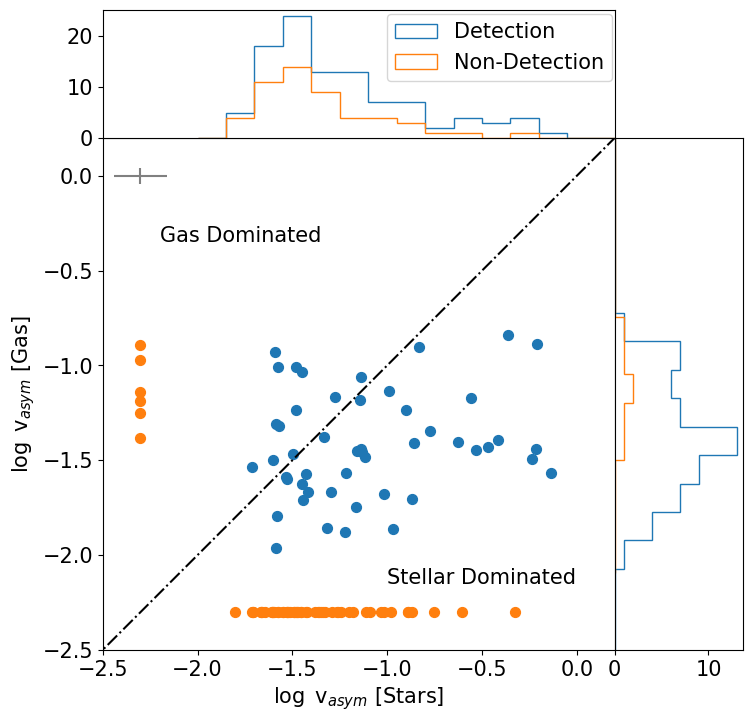

In [165]:
vs = sample["v_asym_s"].to_numpy()
vs_err=sample["v_asym_s_err"].to_numpy()
vg = sample["v_asym_g"].to_numpy()
vg_err=sample["v_asym_g_err"].to_numpy()
vs[vs==1e-3]=5e-3
vg[vg==1e-3]=5e-3
xerr = vs_err/((np.log(10)*(vs)))
yerr = vg_err/((np.log(10)*(vg)))
xerr = np.nanmean(xerr)
yerr = np.nanmean(yerr)
plt.rcParams.update({"font.size":15})

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.0, hspace=0.0)
ax = fig.add_subplot(gs[1,0])
p=ax.scatter(np.log10(vs[(vs>8e-3) & (vg>8e-3)]),np.log10(vg[(vs>8e-3) & (vg>8e-3)]),s=50)
ax.scatter(np.log10(vs[(vs>8e-3) & (vg<8e-3)]),np.log10(vg[(vs>8e-3) & (vg<8e-3)]),s=50)
ax.scatter(np.log10(vs[(vs<8e-3) & (vg>8e-3)]),np.log10(vg[(vs<8e-3) & (vg>8e-3)]),s=50,c="tab:orange")
ax.errorbar(np.log10(5e-3),0,xerr=xerr,yerr=yerr,color="grey",ls="")
ax.plot(np.linspace(-3.3,1),np.linspace(-3.3,1),ls="dashdot",color="k")
ax.set_xlabel(r"$\log$ v$_{asym}$ [Stars]")
ax.text(s="Gas Dominated",x=-2.2,y=-0.35)
ax.text(s="Stellar Dominated",x=-1,y=-2.15)
ax.set_ylabel(r"$\log$ v$_{asym}$ [Gas]")
ax_histx = fig.add_subplot(gs[0,0])
ax_histx.hist(np.log10(vs[vs>8e-3]),histtype="step",bins=np.arange(-2,0.65,0.15),
              label="Detection")
ax_histx.hist(np.log10(vs[vg<8e-3]),histtype="step",bins=np.arange(-2,0.65,0.15),
              label="Non-Detection")
ax_histx.set_xticks([])
ax_histx.legend(bbox_to_anchor=(1.015,1.05))
ax_histy = fig.add_subplot(gs[1,1])
ax_histy.hist(np.log10(vg[vg>8e-3]),histtype="step",orientation="horizontal",
              bins=np.arange(np.log10(3e-3),0.65,0.15))
ax_histy.hist(np.log10(vg[vs<8e-3]),histtype="step",orientation="horizontal",
              bins=np.arange(np.log10(8e-3),0.65,0.15))
ax_histy.set_yticks([])
ax.set_xlim(-2.5,0.2)
ax.set_ylim(-2.5,0.2)
ax_histx.set_xlim(-2.5,0.2)
ax_histy.set_ylim(-2.5,0.2)
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g.pdf",bbox_inches="tight")

In [166]:
import astropy
file = fits.open("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/pa_gas_results.fits")
#file.info()
table = astropy.table.Table(file[1].data)
csv = table.write("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_gas_PA.csv",
                  overwrite=True)
file = fits.open("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/pa_stellar_results.fits")
#file.info()
table = astropy.table.Table(file[1].data)
csv = table.write("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_stellar_PA.csv",
                  overwrite=True)

In [167]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_S05.csv")
gas_pa = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_gas_PA.csv")
stars_pa = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_stellar_PA.csv")
gas_pa = gas_pa[gas_pa["ID"].isin(sample["MAGPIID"])]
stars_pa = stars_pa[stars_pa["ID"].isin(sample["MAGPIID"])]
gas_pa = gas_pa[gas_pa["ID"].isin(stars_pa["ID"])]
pa_sample = sample[sample['MAGPIID'].isin(stars_pa["ID"])]
pa_ssp = ssp[ssp['MAGPIID'].isin(pa_sample["MAGPIID"])]

In [168]:
dpa =[]
for i in range(len(sample)):
    if np.isnan(sample['v_asym_s'].to_numpy()[i]) or np.isnan(sample["v_asym_g"].to_numpy()[i]):
        dpa.append(np.nan)
    else:
        gpa = gas_pa[gas_pa["ID"].isin([sample['MAGPIID'].to_numpy()[i]])]
        spa = stars_pa[stars_pa["ID"].isin([sample['MAGPIID'].to_numpy()[i]])]
        if len(gpa)==0 or len(spa)==0:
            dpa.append(np.nan)
        else:
            dpa.append(abs(gpa["PA_gas"].to_numpy() - spa["PA_stars"].to_numpy()))
print(len(dpa))
sample["DPA"]=dpa

107


/var/folders/hn/phg07l9934x4013mnrp122c40000gn/T/ipykernel_2918/2497667831.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  p=ax[0].scatter(10**(age[vs>2e-3]),vs[vs>2e-3],zorder=2,vmin=0,vmax=50)


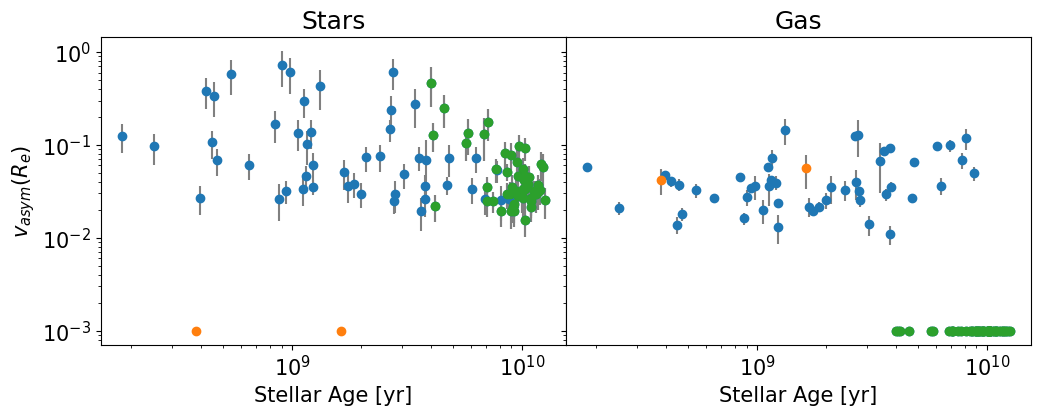

In [169]:
ssp = ssp[ssp["MAGPIID"].isin(pa_sample["MAGPIID"])]
vs = pa_sample["v_asym_s"].to_numpy()
vs_err=pa_sample["v_asym_s_err"].to_numpy()
vg = pa_sample["v_asym_g"].to_numpy()
vg_err=pa_sample["v_asym_g_err"].to_numpy()
age = pa_ssp["logage_LW_1re"].to_numpy()
vs_err[np.isnan(vs)]=0
vg_err[np.isnan(vg)]=0
vs[np.isnan(vs)]=1e-3
vg[np.isnan(vg)]=1e-3
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey="row")
p=ax[0].scatter(10**(age[vs>2e-3]),vs[vs>2e-3],zorder=2,vmin=0,vmax=50)
ax[0].errorbar(10**(age[vs>2e-3]),vs[vs>2e-3],yerr=vs_err[vs>2e-3],ls="",color="grey",zorder=1)
ax[0].scatter(10**(age[vs<2e-3]),vs[vs<2e-3],zorder=2)
ax[0].errorbar(10**(age[vs<2e-3]),vs[vs<2e-3],yerr=vs_err[vs<2e-3],ls="",color="grey",zorder=1)
ax[0].scatter(10**(age[vg<2e-3]),vs[vg<2e-3],zorder=2)
ax[0].errorbar(10**(age[vg<2e-3]),vs[vg<2e-3],yerr=vs_err[vg<2e-3],ls="",color="grey",zorder=1)
ax[1].scatter(10**(age[vs>2e-3]),vg[vs>2e-3],zorder=2)
ax[1].errorbar(10**(age[vs>2e-3]),vg[vs>2e-3],yerr=vg_err[vs>2e-3],ls="",color="grey",zorder=1)
ax[1].scatter(10**(age[vs<2e-3]),vg[vs<2e-3],zorder=2)
ax[1].errorbar(10**(age[vs<2e-3]),vg[vs<2e-3],yerr=vg_err[vs<2e-3],ls="",color="grey",zorder=1)
ax[1].scatter(10**(age[vg<2e-3]),vg[vg<2e-3],zorder=2)
ax[1].errorbar(10**(age[vg<2e-3]),vg[vg<2e-3],yerr=vg_err[vg<2e-3],ls="",color="grey",zorder=1)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[0].set_title("Stars")
ax[1].set_title("Gas")
ax[0].set_ylabel(r"$v_{asym}(R_e)$")
ax[0].set_xlabel(r"Stellar Age [yr]")
ax[1].set_xlabel(r"Stellar Age [yr]")
plt.subplots_adjust(wspace=0)
#plt.colorbar(p,ax=ax,location="top",aspect=50)
plt.show()

In [170]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
sample = sample[np.isnan(sample["v_asym_g"])]
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
env = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/kinemetry_sample_env.csv")
env_sample = sample[sample["MAGPIID"].isin(env["MAGPIID"])]
# env_sample = env_sample[(env_sample["v_asym_s"]>np.std(vs[vs>2e-3])) &
#                         (env_sample["v_asym_g"]>np.std(vg[vg>2e-3]))]
env = env[env["MAGPIID"].isin(env_sample["MAGPIID"])]
ssp = ssp[ssp["MAGPIID"].isin(env_sample["MAGPIID"])]
prospect = prospect[prospect["MAGPIID"].isin(env_sample["MAGPIID"])]
vs = env_sample["v_asym_s"].to_numpy()
vs[np.isnan(vs)]=1e-3
vg = env_sample["v_asym_g"].to_numpy()
vg[np.isnan(vg)]=1e-3

print(env_sample["MAGPIID"].to_numpy())
print(env["d1,kpc"].to_numpy())
print(ssp["logage_LW_1re"].to_numpy())
print(prospect["StellarMass_median"].to_numpy())
print(env["BCG?"].to_numpy())
print(np.max(np.log10(prospect["StellarMass_median"].to_numpy())) - np.min(np.log10(prospect["StellarMass_median"].to_numpy())))

[1201197192 1201197199 1201252223 1203040085 1203070184 1203087201
 1203196196 1203230310 1203305151 1205093221 1206159217 1206196198
 1206205075 1206305217 1208197197 1501101303 1501176107 1501180123
 1501196198 1501339278 1502197197 1503197197 1505197196 1506211197
 1507196198 1511197198 1523197197 1525170222 1525196197 1525231324
 1527196197 1529198197 1530197196 1534149233 1534176099 1534198197
 1534207240 1534224157 1534302074 1534360194 2301196197 2301262343
 2302196199 2302197233 2305197198 2307145281 2307197200 2307203233
 2307228105 2307355263]
[  9.5371441    9.55463505  81.71545018  79.16402304 119.1675171
  29.4749532   29.51004539 123.76117863  44.6925302  124.0428645
  53.89156474  53.69633699  72.31235087  29.05561252 175.70818427
 117.38129404  20.2316883   20.30989635  44.05280251  97.06710099
  69.71594815  15.4189552   64.70502014  14.4242789  126.79085718
  82.52033433  53.73365771  45.72972851  45.45495657  94.59306932
  30.04422117  18.46815812  33.78492352  57.14

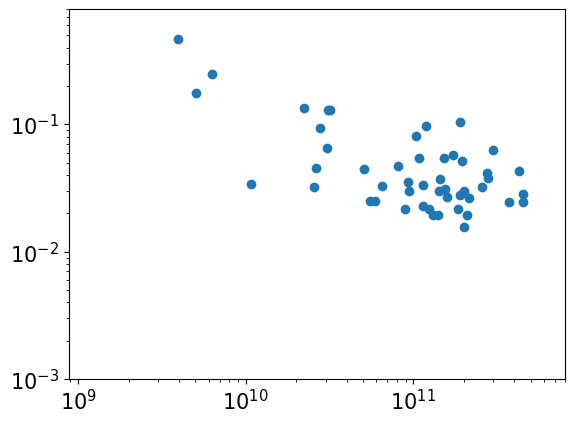

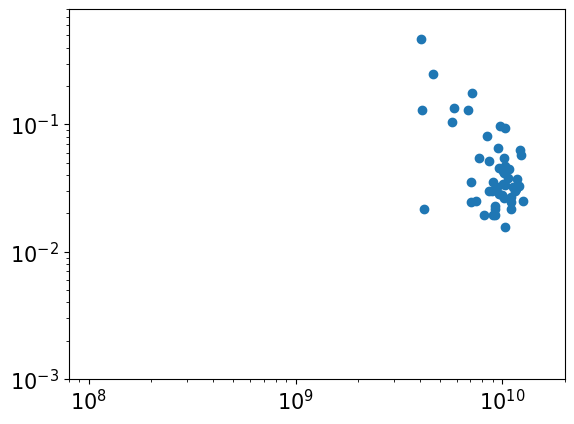

ValueError: x and y must be the same size

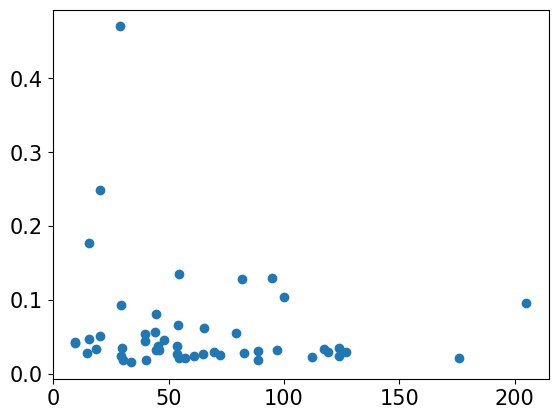

In [171]:
fig,ax =plt.subplots()
ax.scatter(prospect["StellarMass_median"].to_numpy()[vs>8e-3],vs[vs>8e-3])
ax.scatter(prospect["StellarMass_median"].to_numpy()[vg>8e-3],vg[vg>8e-3])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-3,0.8)
ax.set_xlim(8.8e8,8e11)
plt.show()
fig,ax =plt.subplots()
ax.scatter(10**(ssp["logage_LW_1re"].to_numpy()[vs>8e-3]),vs[vs>8e-3])
ax.scatter(10**(ssp["logage_LW_1re"].to_numpy()[vg>8e-3]),vg[vg>8e-3])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-3,0.8)
ax.set_xlim(8e7,2e10)
plt.show()

fig,ax =plt.subplots()
ax.scatter(env["d1,kpc"],vs[vs>8e-3])
ax.scatter(env["d1,kpc"],vg[vg>8e-3])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-3,0.8)
#ax.set_xlim(8e7,2e10)
plt.show()

In [ ]:
fig,ax = plt.subplots()
ax.scatter(vs,vg)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.logspace(-4,1),np.logspace(-4,1),ls="dashed",color="k")
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),color='k',ls="dashed")
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),color="k",ls="dashed")
ax.set_xlim(8e-4,1.5)
ax.set_ylim(8e-4,1.5)
ax.set_ylabel(r"v$_{asym}$ [Gas]")
ax.set_xlabel(r"v$_{asym}$ [Stars]")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g_plain.pdf",bbox_inches="tight")

fig,ax = plt.subplots()
ax.scatter(vs,vg,c="k",alpha=0.2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.logspace(-4,1),np.logspace(-4,1),ls="dashed",color="k")
ax.text(s="Gas Dominated",x=2e-3,y=1e-1)
ax.text(s="Stellar Dominated",x=4.8e-2,y=2e-3)
#ax.text(s="Stellar Dominated",x=2e-3,y=1e-1)
#ax.text(s="Merger\nDriven",x=2e-1,y=8e-3)
ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),color='k',ls="dashed")
ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),color="k",ls="dashed")
ax.set_xlim(8e-4,1.5)
ax.set_ylim(8e-4,1.5)
ax.set_ylabel(r"v$_{asym}$ [Gas]")
ax.set_xlabel(r"v$_{asym}$ [Stars]")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g_grey.pdf",bbox_inches="tight")

fig,ax = plt.subplots()
#ax.scatter(vs,vg,c="k",alpha=0.2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.logspace(-4,1),np.logspace(-4,1),ls="dashed",color="k")
ax.text(s="Gas Dominated",x=2e-3,y=1e-1)
ax.text(s="Stellar Dominated",x=4.8e-2,y=2e-3)
#ax.text(s="Stellar Dominated",x=2e-3,y=1e-1)
#ax.text(s="Merger\nDriven",x=2e-1,y=8e-3)
#ax.text(s="Accretion\nDriven",x=4e-2,y=2e-1)
#ax.vlines(x=np.std(vs[vs>2e-3]),ymin=10**(-3.2),ymax=np.std(vg[vg>2e-3]),color='k',ls="dashed")
#ax.hlines(y=np.std(vg[vg>2e-3]),xmin=10**(-3.2),xmax=np.std(vs[vs>2e-3]),color="k",ls="dashed")
ax.set_xlim(8e-4,1.5)
ax.set_ylim(8e-4,1.5)
ax.set_ylabel(r"v$_{asym}$ [Gas]")
ax.set_xlabel(r"v$_{asym}$ [Stars]")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g_labels.pdf",bbox_inches="tight")

In [ ]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
sample = sample.dropna()
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]

vs = sample["v_asym_s"].to_numpy()
#vs = vs[~np.isnan(vs)]
vg = sample["v_asym_g"].to_numpy()
#vg = vg[~np.isnan(vg)]
len(sample[vs>vg])/len(sample)

In [ ]:
scipy.stats.pearsonr(np.log10(vs),np.log10(prospect["StellarMass_median"]))

In [ ]:
scipy.stats.pearsonr(np.log10(vg),np.log10(prospect["StellarMass_median"]))

In [ ]:
onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
same
#sample = sample[sample["MAGPIID"].isin(onre["MAGPIID"])]
onere = onere[onere["MAGPIID"].isin(sample["MAGPIID"])]
s05_s = np.sqrt((0.5*sample["V_rot_s"])**2 + sample["Sigma_s"]**2)
s05_g = np.sqrt((0.5*sample["V_rot_g"])**2 + sample["Sigma_g"]**2)

fig,ax = plt.subplots()
ax.scatter(np.linspace(0,len(sample),len(sample)),np.array(s05_s/s05_g))
ax.set_ylim(0,3)
plt.show()
print(np.nanmean(np.array(s05_s/s05_g)))
print(np.nanstd(np.array(s05_s/s05_g)))

fig,ax = plt.subplots()
ax.scatter(sample["Sigma_s"],onere["v_asym_s"],label="Stars")
ax.scatter(sample["Sigma_g"],onere["v_asym_g"],label="Gas")
#ax.set_ylim(0,3)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"v$_{asym}$")
ax.set_xlabel(r"$\sigma$ [kms$^{-1}$]")
plt.show()
print(np.nanmean(np.array(s05_s/s05_g)))
print(np.nanstd(np.array(s05_s/s05_g)))

In [ ]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
prospect = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
ssp = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")
ssp = ssp[ssp["MAGPIID"].isin(sample["MAGPIID"])]
galfit = galfit[galfit["MAGPIID"].isin(sample["MAGPIID"])]
n = galfit["n"].to_numpy()
mass =prospect["StellarMass_median"]
vs = sample["v_asym_s"].to_numpy()
vs_err=sample["v_asym_s_err"].to_numpy()
vg = sample["v_asym_g"].to_numpy()
vg_err=sample["v_asym_g_err"].to_numpy()
age = ssp["logage_LW_1re"].to_numpy()
vs_err[np.isnan(vs)]=0
vg_err[np.isnan(vg)]=0
vs[np.isnan(vs)]=1e-3
vg[np.isnan(vg)]=1e-3
fig,ax = plt.subplots()
p=ax.scatter(vs,vg,c=age,zorder=2,s=50)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,ls="",color="grey",zorder=1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.logspace(-4,2),np.logspace(-4,2),ls="dashed",color="k")
ax.set_xlim(8e-4,1.2)
ax.set_ylim(8e-4,1.2)
ax.set_xlabel(r"v$_{\rm asym}$ [Stars]")
ax.set_ylabel(r"v$_{\rm asym}$ [Gas]")
plt.colorbar(p,ax=ax,label=r"$\log$ Age [yr]")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g_age.pdf",bbox_inches="tight")

fig,ax = plt.subplots()
p=ax.scatter(vs,vg,c=np.log10(mass),zorder=2,s=50)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,ls="",color="grey",zorder=1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.logspace(-4,2),np.logspace(-4,2),ls="dashed",color="k")
ax.set_xlim(8e-4,1.2)
ax.set_ylim(8e-4,1.2)
ax.set_xlabel(r"v$_{\rm asym}$ [Stars]")
ax.set_ylabel(r"v$_{\rm asym}$ [Gas]")
plt.colorbar(p,ax=ax,label=r"$\log$ Stellar Mass [M$_\odot$]")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g_mass.pdf",bbox_inches="tight")

fig,ax = plt.subplots()
p=ax.scatter(vs,vg,c=n,zorder=2,s=50,vmin=-0.1,vmax=5.1)
ax.errorbar(vs,vg,xerr=vs_err,yerr=vg_err,ls="",color="grey",zorder=1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.logspace(-4,2),np.logspace(-4,2),ls="dashed",color="k")
ax.set_xlim(8e-4,1.2)
ax.set_ylim(8e-4,1.2)
ax.set_xlabel(r"v$_{\rm asym}$ [Stars]")
ax.set_ylabel(r"v$_{\rm asym}$ [Gas]")
plt.colorbar(p,ax=ax,label=r"S$\'{\rm e}$rsic Index")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/asym_s_g_sersic.pdf",bbox_inches="tight")

In [ ]:
sample = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05.csv")
sample_no_nans = sample.dropna()
len(sample_no_nans[sample_no_nans["v_asym_s"]>sample_no_nans["v_asym_g"]])/len(sample_no_nans)

In [ ]:
sample.dropna()

In [ ]:
ssp["logage_LW_1re_err"]

In [ ]:
sample_no_err = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_s05_no_err.csv")
sample_no_err = sample_no_err.dropna()
sample = sample[sample["MAGPIID"].isin(sample_no_err["MAGPIID"])]
galfit = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_GalfitSersicCat_v0.1.csv")

fig,ax = plt.subplots()
ax.scatter(sample_no_err['SNR_g'],sample["v_asym_g_err"],label="Gas")
#ax.scatter(sample_no_err['SNR_s'],sample["v_asym_s_err"],label="Stars")
ax.set_yscale("log")
ax.set_ylim(3e-4,2)
ax.set_ylabel(r"Err v$_{\rm asym}$")
ax.set_xlabel("SNR")
ax.legend()
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/s05_asym_err_.pdf",bbox_inches="tight")
onere = pd.read_csv("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_csv/MAGPI_kinemetry_sample_1Re.csv")
onere = onere.dropna()
galfit = galfit[galfit["MAGPIID"].isin(onere["MAGPIID"])]
fig,ax = plt.subplots()
ax.scatter(galfit["n"],onere["v_asym_g_err"],label="Gas")
#ax.scatter(onere['SNR_s'],onere["v_asym_s_err"],label="Stars")
ax.set_yscale("log")
ax.set_xlabel(r"S$\'{e}$rsic")
ax.set_ylim(3e-4,2)
ax.set_ylabel(r"Err v$_{\rm asym}$")
ax.legend()
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/k1_asym_.pdf",bbox_inches="tight")

In [ ]:
fig,ax = plt.subplots()
ax.hist(sample_no_err["v_asym_g"],histtype="step")
ax.vlines(np.nanmedian(sample_no_err["v_asym_g"]),ymin=0,ymax=19,ls="dashdot",color="k")
#ax.vlines(np.nanstd(sample_no_err["v_asym_g"]),ymin=0,ymax=19,ls="dashdot",color="k")
ax.set_ylim(-0.1,20.1)
ax.set_xlim(-0.01,0.2)
ax.set_xlabel(r"v$_{asym}$")
ax.set_ylabel("N")
plt.savefig("/Users/ryanbagge/Library/CloudStorage/OneDrive-UNSW/MAGPI_Plots/plots/paper2/gas_asym_.pdf",bbox_inches="tight")

In [179]:
cosmo

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)